In [1]:
import mne
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="darkgrid")

In [2]:
# Loading the .set data
eeg = mne.io.read_raw_eeglab(r"C:\Users\willy\Documents\EEG_RP\sub-1_fastReach_EEG.set",preload=True)
print(eeg)

C:\Users\willy\anaconda3\lib\site-packages\mne\externals\pymatreader\utils.py:122: UserWarning: Complex objects (like classes) are not supported. They are imported on a best effort base but your mileage will vary.
  warn('Complex objects (like classes) are not supported. '


<RawEEGLAB | sub-1_fastReach_EEG.set, 64 x 706415 (2825.7 s), ~345.0 MB, data loaded>


In [3]:
#Info
eeg.info

<Info | 7 non-empty values
 bads: []
 ch_names: BrainVision RDA_Fp1, BrainVision RDA_Fz, BrainVision RDA_F3, ...
 chs: 64 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 64
 projs: []
 sfreq: 250.0 Hz
>

In [4]:
eeg.annotations

<Annotations | 760 segments: end (6), start (6), trial_end (373), ...>

In [5]:
ch_names = eeg.ch_names
ch_names

['BrainVision RDA_Fp1',
 'BrainVision RDA_Fz',
 'BrainVision RDA_F3',
 'BrainVision RDA_F7',
 'BrainVision RDA_FT9',
 'BrainVision RDA_FC5',
 'BrainVision RDA_FC1',
 'BrainVision RDA_C3',
 'BrainVision RDA_T7',
 'BrainVision RDA_TP9',
 'BrainVision RDA_CP5',
 'BrainVision RDA_CP1',
 'BrainVision RDA_Pz',
 'BrainVision RDA_P3',
 'BrainVision RDA_P7',
 'BrainVision RDA_O1',
 'BrainVision RDA_Oz',
 'BrainVision RDA_O2',
 'BrainVision RDA_P4',
 'BrainVision RDA_P8',
 'BrainVision RDA_TP10',
 'BrainVision RDA_CP6',
 'BrainVision RDA_CP2',
 'BrainVision RDA_Cz',
 'BrainVision RDA_C4',
 'BrainVision RDA_T8',
 'BrainVision RDA_FT10',
 'BrainVision RDA_FC6',
 'BrainVision RDA_FC2',
 'BrainVision RDA_F4',
 'BrainVision RDA_F8',
 'BrainVision RDA_Fp2',
 'BrainVision RDA_AF7',
 'BrainVision RDA_AF3',
 'BrainVision RDA_AFz',
 'BrainVision RDA_F1',
 'BrainVision RDA_F5',
 'BrainVision RDA_FT7',
 'BrainVision RDA_FC3',
 'BrainVision RDA_C1',
 'BrainVision RDA_C5',
 'BrainVision RDA_TP7',
 'BrainVisio

In [6]:
# Info on the annotations of the dataset.
print(len(eeg.annotations))
print(set(eeg.annotations.duration))
print(set(eeg.annotations.description))
print(eeg.annotations.onset[0])

760
{0.0}
{'start', 'end', 'trial_end', 'trial_start'}
122.008


In [7]:
# Turning the annotations into events, 2 sorts of events
event_id = {"trial_start": 1, "trial_end": 2, "start": 0, "end": 0}

events, event_dict = mne.events_from_annotations(eeg, event_id)
print(event_dict)
print(events[:5])

Used Annotations descriptions: ['end', 'start', 'trial_end', 'trial_start']
{'end': 0, 'start': 0, 'trial_end': 2, 'trial_start': 1}
[[30502     0     0]
 [30502     0     0]
 [31156     0     1]
 [31156     0     1]
 [32686     0     2]]


In [8]:
# Keeping only the events corresponding to 'trial_start' and 'trial_end'
events = mne.pick_events(events, exclude=0)

In [9]:
# Check
print(events[:5])

[[31156     0     1]
 [31156     0     1]
 [32686     0     2]
 [32686     0     2]
 [33603     0     1]]


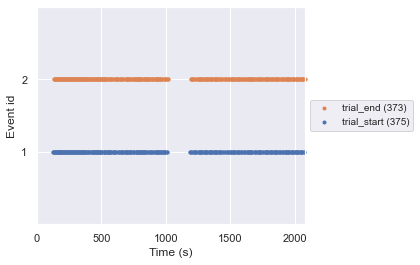

In [10]:
# Just wanted to see how the events repartition looked like
fig = mne.viz.plot_events(events, sfreq=eeg.info['sfreq'],
                          first_samp=eeg.first_samp, event_id={"trial_start": 1, "trial_end": 2})

Using matplotlib as 2D backend.


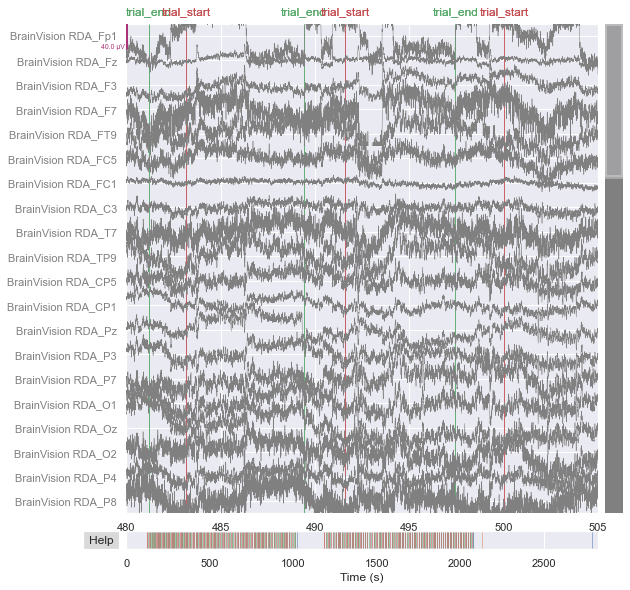

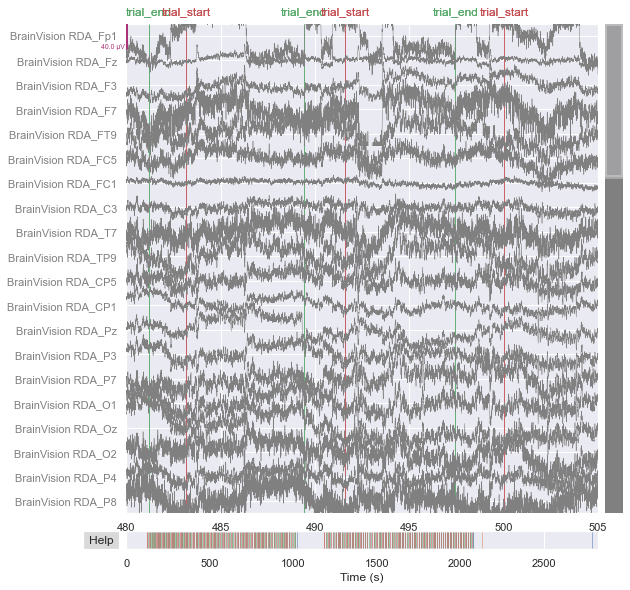

In [11]:
eeg.plot(events=events, start=480, duration=25, color='gray',
         event_color={1: 'r', 2: 'g'})

In [12]:
# Creating epochs from the events. Also some event corresponds to the same sample so drop the repeated events.
epochs = mne.Epochs(eeg, events=events, tmax=1, tmin=-3, event_id={"trial_start": 1, "trial_end":2}, event_repeated='drop')

Not setting metadata
Multiple event values for single event times found. Keeping the first occurrence and dropping all others.
Not setting metadata
386 matching events found
Setting baseline interval to [-3.0, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated


In [13]:
# Averaging the all the epochs of each channel
evokedstart = epochs['trial_start'].average()
evokedend = epochs['trial_end'].average()

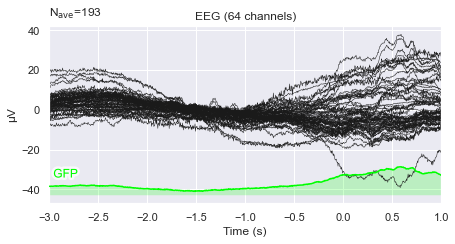

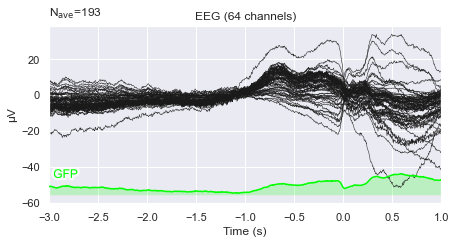

In [14]:
# First exploring the data set following MNE procedure.
fig1 = evokedstart.plot(gfp=True)
fig2 = evokedend.plot(gfp=True)

combining channels using "mean"
combining channels using "mean"


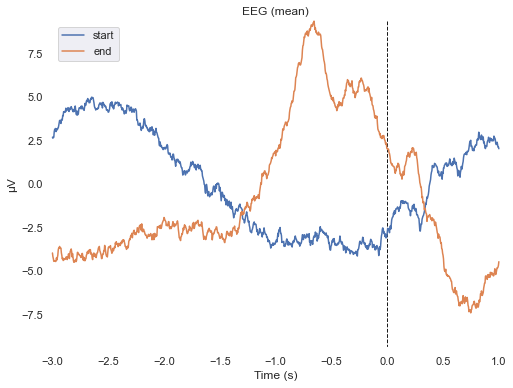

[<Figure size 576x432 with 1 Axes>]

In [15]:
# Just to check if I am right thinking that epochs 'evokedstart' are the one we are interested in. 
# According to the plots I would say yes...
evokeds = dict(start=evokedstart, end=evokedend)
mne.viz.plot_compare_evokeds(evokeds, picks='eeg', combine='mean')

combining channels using "mean"
combining channels using "mean"


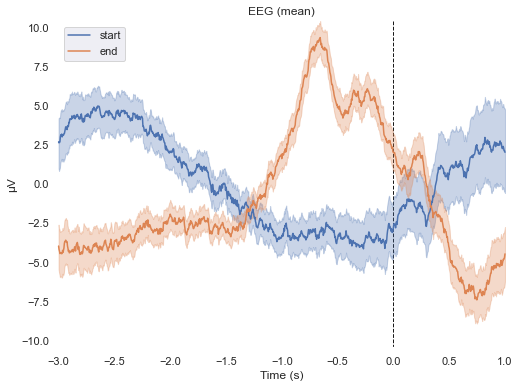

[<Figure size 576x432 with 1 Axes>]

In [16]:
evokeds = dict(start=list(epochs['trial_start'].iter_evoked()),
               end=list(epochs['trial_end'].iter_evoked()))
mne.viz.plot_compare_evokeds(evokeds, combine='mean', picks='eeg')

In [17]:
# Manipulating the Data to get a long format dataset in order to use Seaborn.

# 64x1001 into 64064
data = evokedstart.data
data = np.asarray(data)
data = data.flatten()

# 1001 into 64064
times = evokedstart.times
times = [times]*64
times = np.asarray(times)
times = times.flatten()

print(data.shape)
print(times.shape)

(64064,)
(64064,)


In [18]:
electrodes = []
for ii in range(64):
    for i in range (1001):
        electrodes.append(ch_names[ii])
electrodes = [s.replace('BrainVision ','') for s in electrodes]
electrodes = np.asarray(electrodes)
print(electrodes.shape)
electrodes = electrodes.flatten()
print(electrodes.shape)
print(electrodes[64063])

(64064,)
(64064,)
BrainVision RDA_VEOG


In [19]:
EEG = pd.DataFrame({'Data': data, 'Times': times, 'Electrodes': electrodes})
EEG.head()

,Data,Times,Electrodes
0,-0.000008,-3.000,BrainVision RDA_Fp1
1,-0.000008,-2.996,BrainVision RDA_Fp1
2,-0.000008,-2.992,BrainVision RDA_Fp1
3,-0.000007,-2.988,BrainVision RDA_Fp1
4,-0.000007,-2.984,BrainVision RDA_Fp1


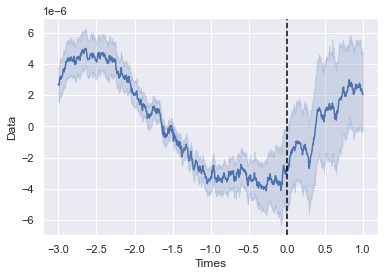

In [20]:
sns.lineplot(data = EEG, x = 'Times', y = 'Data')
plt.axvline(0, color='black', label = 'onset', linestyle ='--')